C:\Users\DY\AppData\Local\Temp\ipykernel_4944\170605334.py:35: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\DY\.conda\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


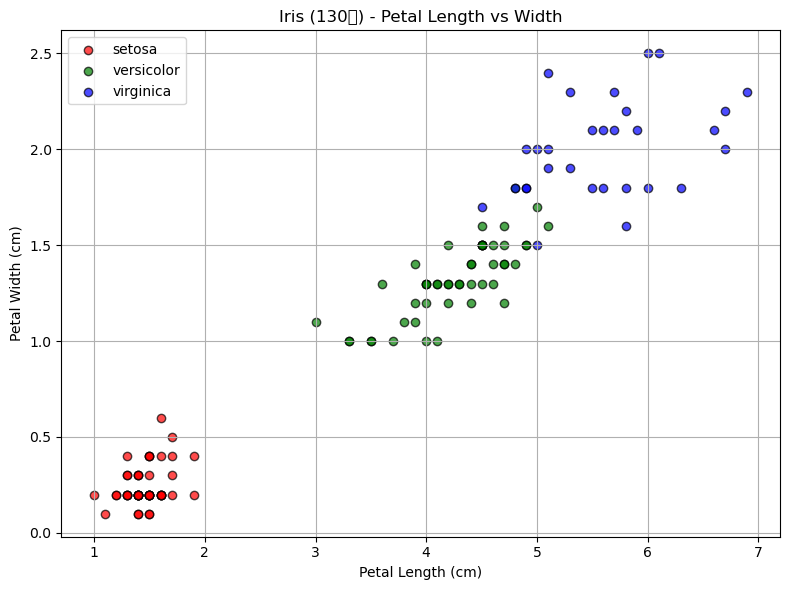

k값별 정확도:
k = 1 -> 정확도: 0.95
k = 2 -> 정확도: 0.92
k = 3 -> 정확도: 0.92
k = 4 -> 정확도: 0.92
k = 5 -> 정확도: 0.97
k = 6 -> 정확도: 0.92
k = 7 -> 정확도: 0.92
k = 8 -> 정확도: 0.92
k = 9 -> 정확도: 0.95
k = 10 -> 정확도: 0.92

 최적의 k값은: 5 (정확도: 0.97)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# 데이터 준비
iris = load_iris()
x = iris.data[:130, [2, 3]] # 꽃잎 길이, 너비
y = iris.target[:130]

df = pd.DataFrame(x, columns=["Petal Length", "Petal Width"])
df["Label"] = y

# 시각화
plt.figure(figsize=(8,6))
colors = ["red", "green", "blue"]
labels = iris.target_names # 품종

for i in range(3):
    subset = df[df["Label"] == i]
    plt.scatter(
        subset["Petal Length"],
        subset["Petal Width"],
        color = colors[i],
        label = labels[i],
        alpha = 0.7,
        edgecolors='k'
    )

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris (130개) - Petal Length vs Width")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. 유클리드 거리 함수
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# 2. KNN 예측 함수
def knn_predict(x, x_train, y_train, k):
    distances = [euclidean_distance(x, xi) for xi in x_train]
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]

    # 다수결
    labels, counts = np.unique(k_labels, return_counts=True)
    return labels[np.argmax(counts)]

# 3. 정확도 평가 함수
def compute_accuracy(x_val, y_val, x_train, y_train, k):
    correct = 0
    for x, y in zip(x_val, y_val):
        pred = knn_predict(x, x_train, y_train, k)
        if pred == y:
            correct += 1
    return correct / len(y_val)

# 4. 훈련/검증 데이터 분할
np.random.seed(45)
indices = np.random.permutation(len(x))
split = int(0.7 * len(x))

train_idx = indices[:split]
val_idx = indices[split:]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# 5. k값 최적화
k_candidates = range(1, 11)
best_k = None
best_acc = 0.0

print("k값별 정확도:")
for k in k_candidates:
    acc = compute_accuracy(x_val, y_val, x_train, y_train, k)
    print(f"k = {k} -> 정확도: {acc:.2f}")
    if acc > best_acc:
        best_acc = acc
        best_k = k

print(f"\n 최적의 k값은: {best_k} (정확도: {best_acc:.2f})")

In [2]:
data131 = iris.target[130]
data132 = iris.target[131]
data131_x = iris.data[130, [2, 3]]
data132_x = iris.data[131, [2, 3]]
p131 = knn_predict(data131_x, x_train, y_train, 9)
p132 = knn_predict(data132_x, x_train, y_train, 9)
print("실제 데이터 :", labels[data131], labels[data132])
print("예측 데이터 :", labels[p131], labels[p132])

실제 데이터 : virginica virginica
예측 데이터 : virginica virginica


C:\Users\DY\AppData\Local\Temp\ipykernel_4944\2703655648.py:30: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\DY\.conda\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


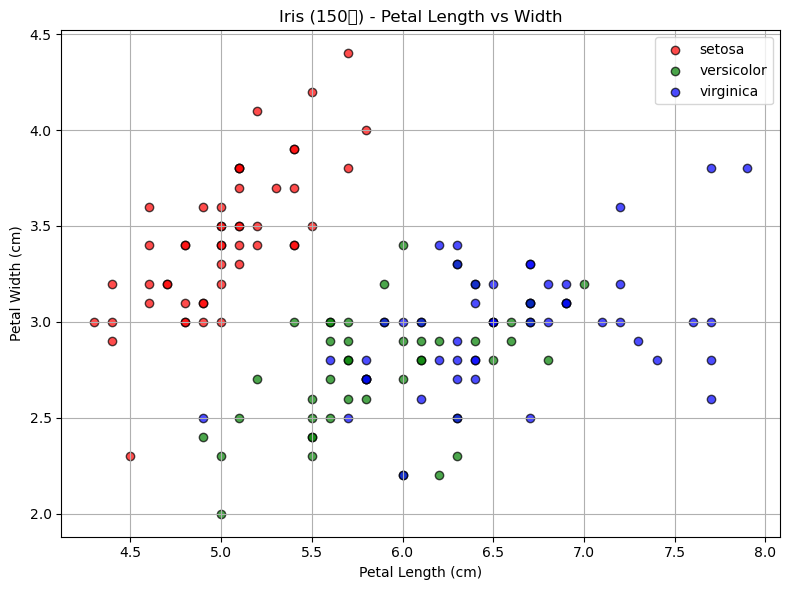

k값별 정확도:
k = 1 -> 정확도: 0.71
k = 2 -> 정확도: 0.62
k = 3 -> 정확도: 0.60
k = 4 -> 정확도: 0.62
k = 5 -> 정확도: 0.69
k = 6 -> 정확도: 0.76
k = 7 -> 정확도: 0.76
k = 8 -> 정확도: 0.73
k = 9 -> 정확도: 0.78
k = 10 -> 정확도: 0.76

 최적의 k값은: 9 (정확도: 0.78)


In [3]:
# 데이터 준비
iris = load_iris()
x = iris.data[:150, [0, 1]] # 꽃잎 길이, 너비
y = iris.target[:150]

df = pd.DataFrame(x, columns=["Petal Length", "Petal Width"])
df["Label"] = y

# 시각화
plt.figure(figsize=(8,6))
colors = ["red", "green", "blue"]
labels = iris.target_names # 품종

for i in range(3):
    subset = df[df["Label"] == i]
    plt.scatter(
        subset["Petal Length"],
        subset["Petal Width"],
        color = colors[i],
        label = labels[i],
        alpha = 0.7,
        edgecolors='k'
    )

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris (150개) - Petal Length vs Width")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. 훈련/검증 데이터 분할
np.random.seed(45)
indices = np.random.permutation(len(x))
split = int(0.7 * len(x))

train_idx = indices[:split]
val_idx = indices[split:]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# 5. k값 최적화
k_candidates = range(1, 11)
best_k = None
best_acc = 0.0

print("k값별 정확도:")
for k in k_candidates:
    acc = compute_accuracy(x_val, y_val, x_train, y_train, k)
    print(f"k = {k} -> 정확도: {acc:.2f}")
    if acc > best_acc:
        best_acc = acc
        best_k = k

print(f"\n 최적의 k값은: {best_k} (정확도: {best_acc:.2f})")
